In [128]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 90)

data_path = '../../data/Prod data.xlsx'
#df = pd.read_excel(data_path, index_col=1)  # в качестве индекса используется столбец скважин
df = pd.read_excel(data_path)  # в качестве индекса используется столбец скважин
df[:5]

,Date,Well,Formation,Lift type,"Choke, mm","THP, MPa","Oil production, m3","Oil production (actual), t","Water production, m3","Water production, t",...,"Oil density, t/m3","Water density, t/m3",Working hours,Downtime hours,"Oil production (plan) daily, t/d","Oil production (plan), t",Workover,Field,Longitude,Latitude
0,1996-05-01,Plat-2,Evlanov-Livenskian,Natural flow,NaN,NaN,1549.516908,1283.0,0.0,0.0,...,0.828,1.164,336.0,408.0,NaN,NaN,NaN,Pamyatno-Sasovskoe,45.173402,50.798989
1,1996-06-01,Plat-2,Evlanov-Livenskian,Natural flow,NaN,NaN,4330.917874,3586.0,0.0,0.0,...,0.828,1.164,696.0,24.0,NaN,NaN,NaN,Pamyatno-Sasovskoe,45.173402,50.798989
2,1996-07-01,Plat-2,Evlanov-Livenskian,Natural flow,NaN,NaN,5179.951691,4289.0,0.0,0.0,...,0.828,1.164,744.0,0.0,NaN,NaN,NaN,Pamyatno-Sasovskoe,45.173402,50.798989
3,1996-08-01,Plat-2,Evlanov-Livenskian,Natural flow,NaN,NaN,5056.763285,4187.0,0.0,0.0,...,0.828,1.164,744.0,0.0,NaN,NaN,NaN,Pamyatno-Sasovskoe,45.173402,50.798989
4,1996-09-01,Plat-2,Evlanov-Livenskian,Natural flow,NaN,NaN,5208.937198,4313.0,0.0,0.0,...,0.828,1.164,720.0,0.0,NaN,NaN,NaN,Pamyatno-Sasovskoe,45.173402,50.798989


In [129]:
df[:]['Date']

0      1996-05-01
1      1996-06-01
2      1996-07-01
3      1996-08-01
4      1996-09-01
          ...    
6223          NaT
6224          NaT
6225          NaT
6226          NaT
6227          NaT
Name: Date, Length: 6228, dtype: datetime64[ns]

In [130]:
df.dtypes  # типы данных

Date                                datetime64[ns]
Well                                        object
Formation                                   object
Lift type                                   object
Choke, mm                                  float64
THP, MPa                                   float64
Oil production, m3                         float64
Oil production (actual), t                 float64
Water production, m3                       float64
Water production, t                        float64
Gas production, M m3                       float64
WCT, %                                     float64
Oil density, t/m3                          float64
Water density, t/m3                        float64
Working hours                              float64
Downtime hours                             float64
Oil production (plan) daily, t/d           float64
Oil production (plan), t                   float64
Workover                                    object
Field                          

In [131]:
df['Oil production (actual), t'] = df['Oil production (actual), t'].astype('float')
df['Working hours'] = df['Working hours'].astype('float')

No handles with labels found to put in legend.


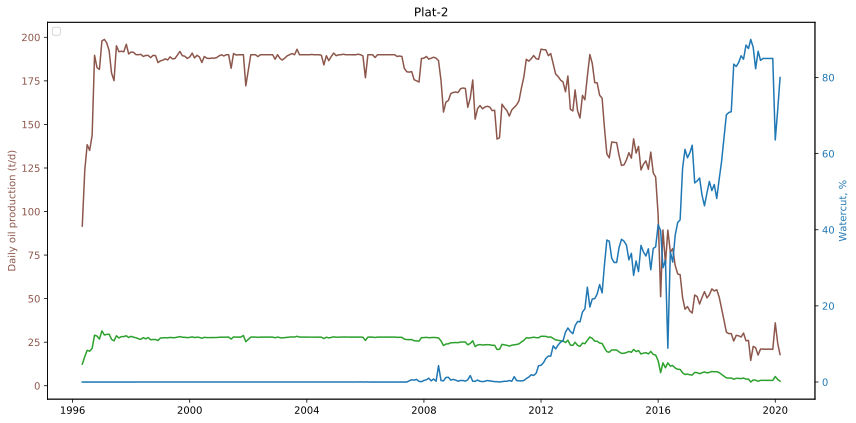

In [132]:
# Create some mock data
t = df['Date']
well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (12, 6))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1.plot(t, data3, color=color)

legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color="black")

plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()

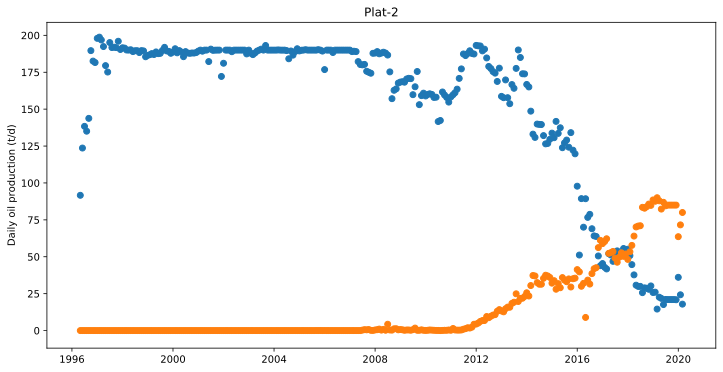

In [133]:
well_name = 'Plat-2'

plt.figure(figsize = (12, 6))
plt.scatter(df['Date'],
           (df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24))
plt.scatter(df['Date'], df['WCT, %'].where(df['Well'] == well_name))
plt.title('Daily oil production (t/d)')
plt.ylabel('Daily oil production (t/d)')
plt.title(well_name)
plt.show()

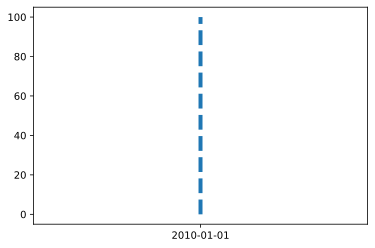

In [134]:
plt.plot(['2010-01-01'] * 100, np.linspace(0, 100, 100), label='median', linestyle='--', linewidth=4)
plt.show()